In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
my_file = 'C:/Users/mrhar/Desktop/Projects/Machine Learning ca1/Shill Bidding Dataset.csv'
df = pd.read_csv(my_file)
print(df.shape)
df.head()

(6321, 13)


Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio   
0          1         732     _***i         0.200000       0.400000  \
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average   
0                    0.0      0.000028           0.0                0.993593  \
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [3]:
df = df.drop(columns='Bidder_ID')
print(df.isna().sum())

Record_ID                 0
Auction_ID                0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64


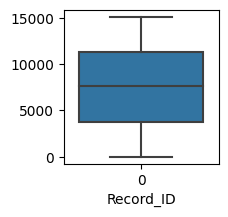

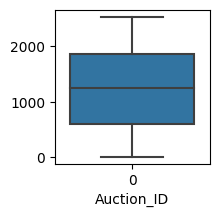

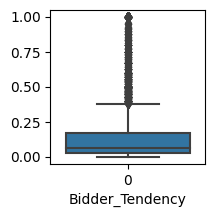

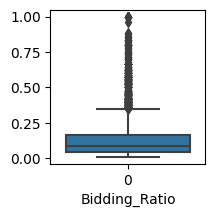

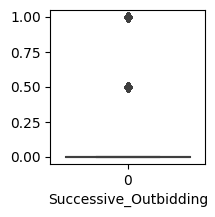

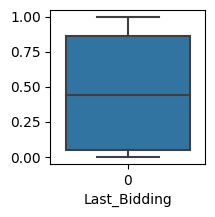

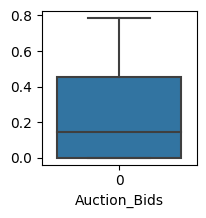

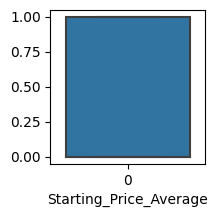

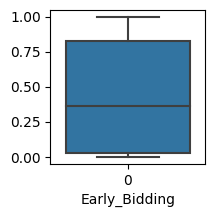

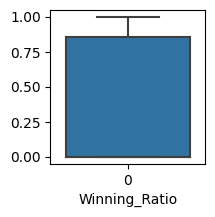

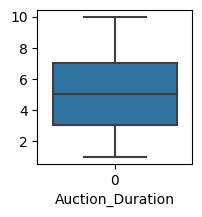

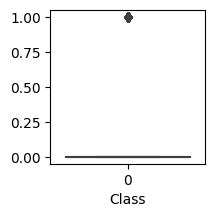

In [4]:
for i in df.columns:
  plt.subplots(figsize=(2,2))
  sns.boxplot(df[i]).set(xlabel=i)

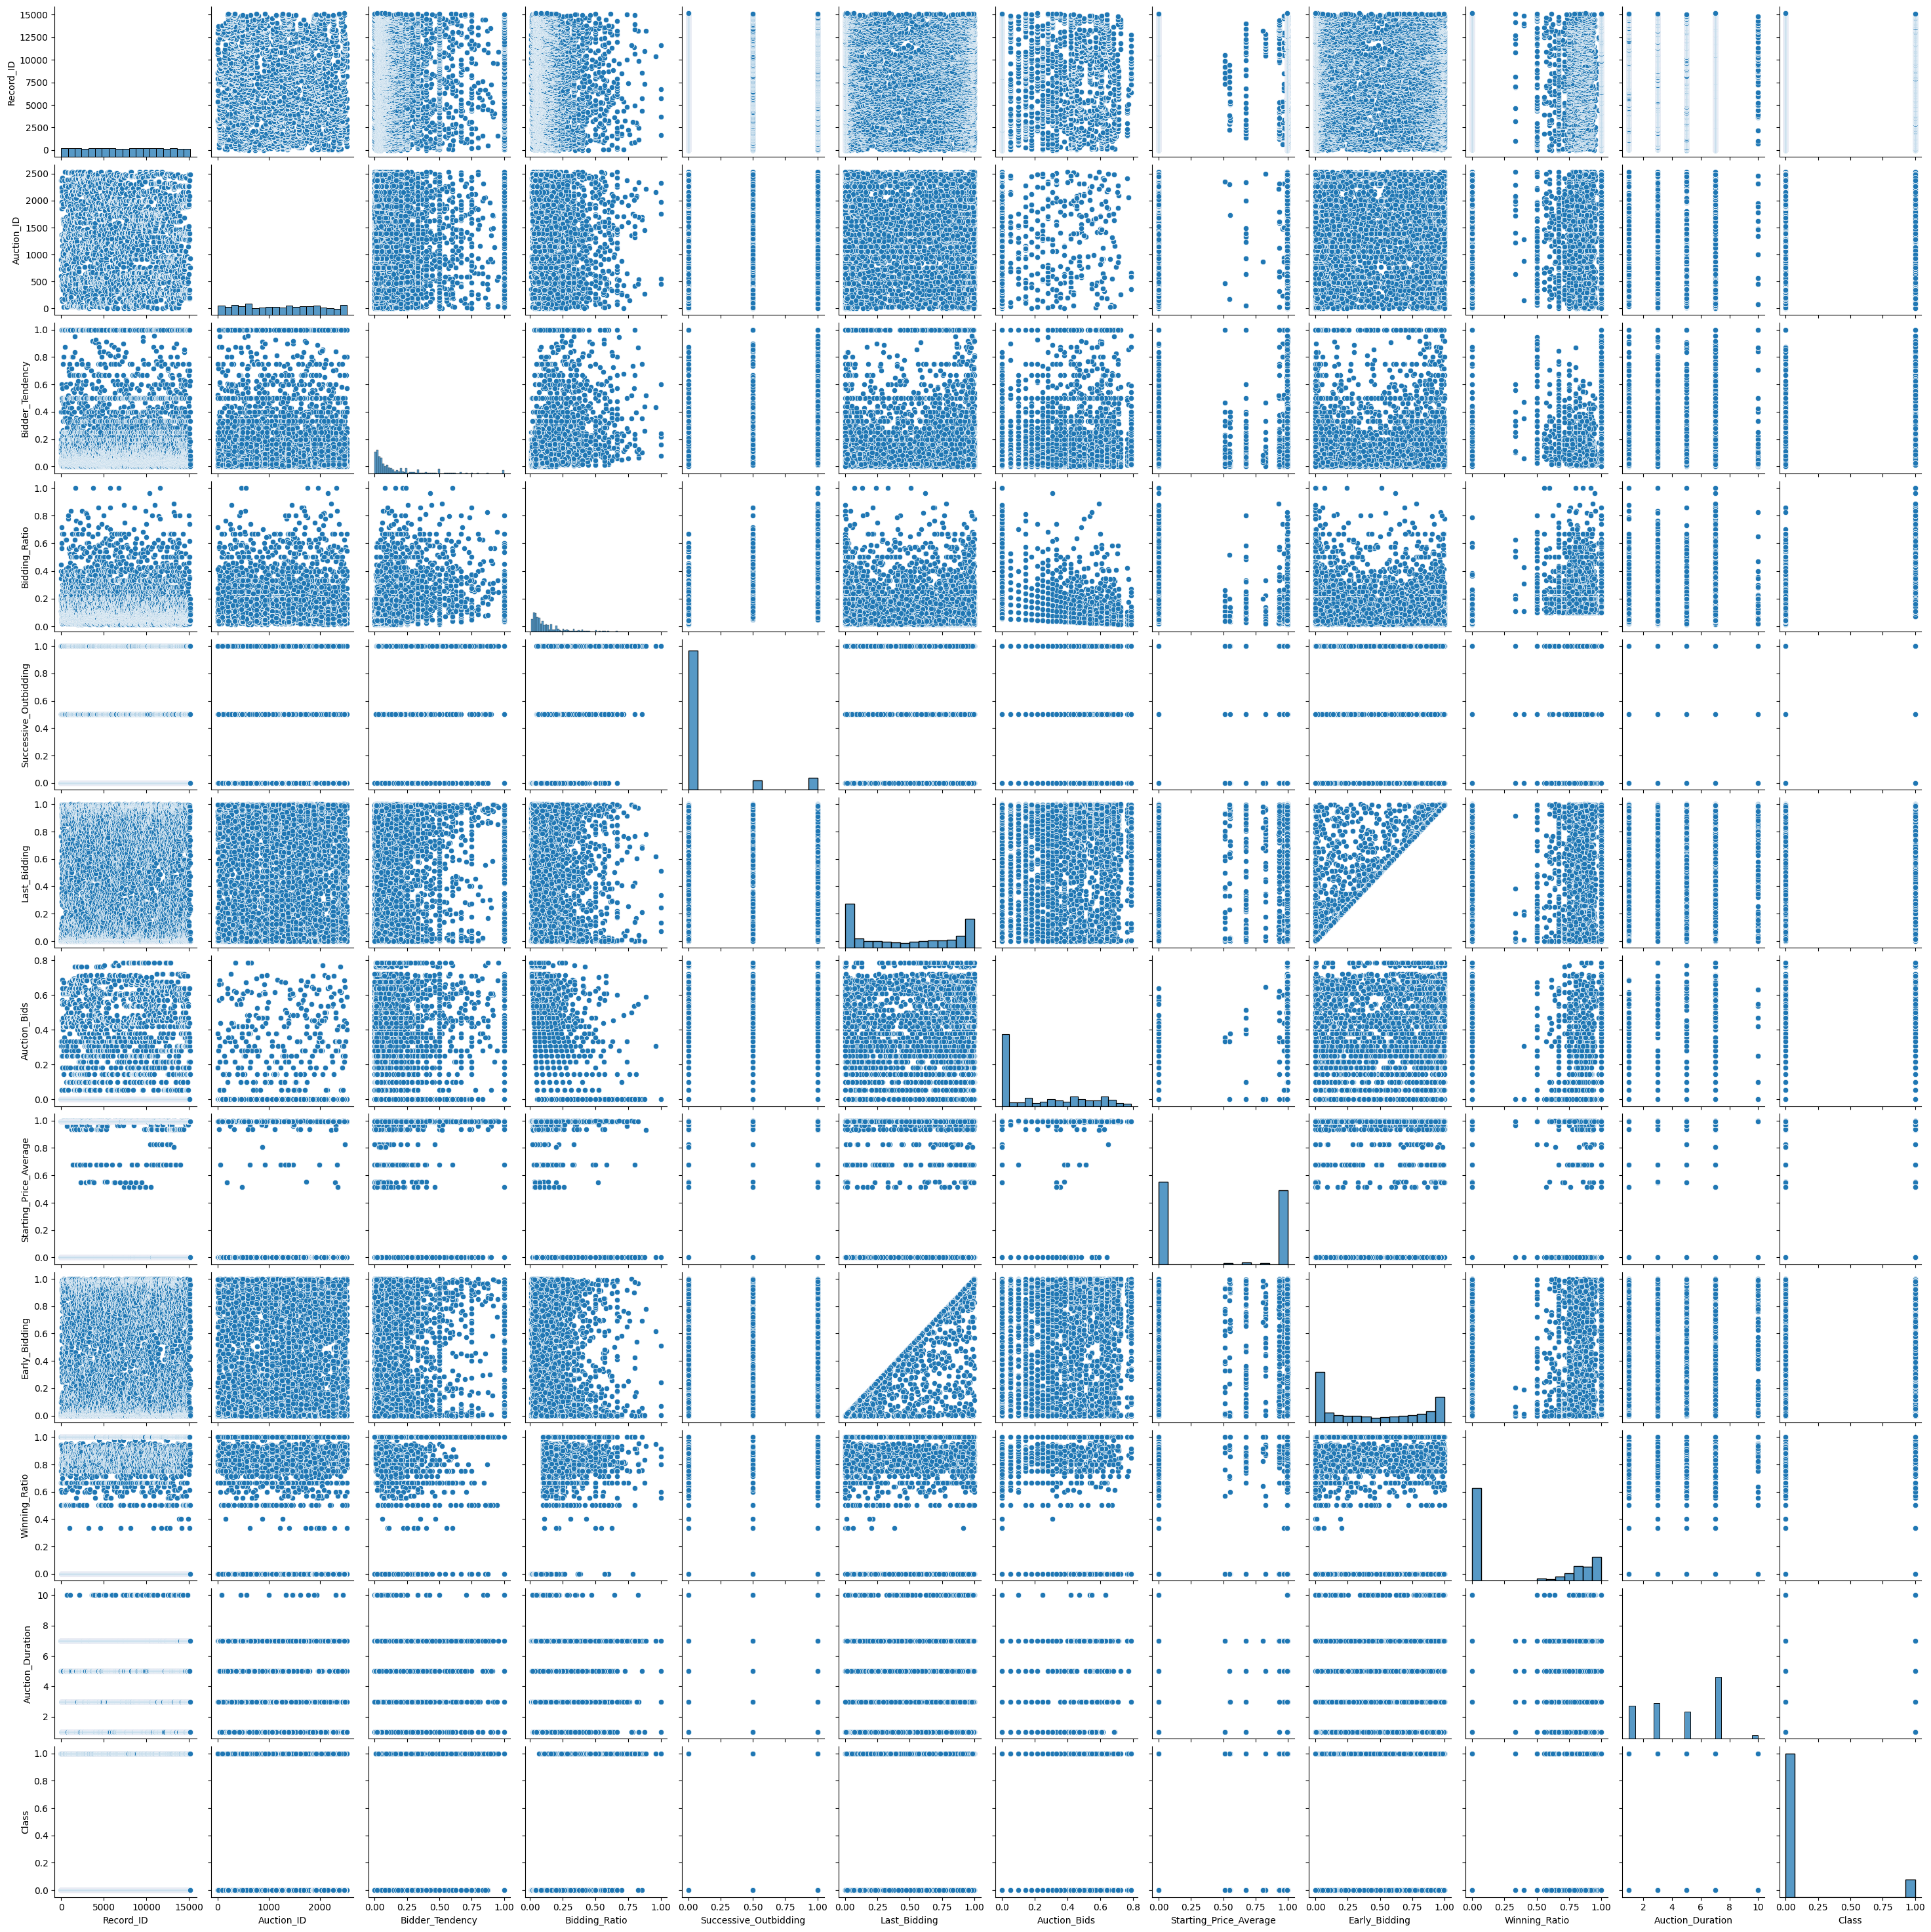

In [5]:
sns.pairplot(df[df.columns])

<Axes: >

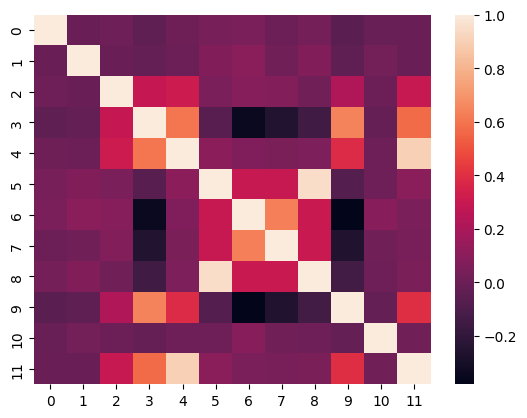

In [6]:
sns.heatmap(np.corrcoef(df.values.T))

Normalization

In [7]:
df_normalized = df[['Auction_ID','Auction_Duration']]
df_rest = df.drop(columns = ['Auction_ID','Auction_Duration'])
scaled = MinMaxScaler().fit(df_normalized)
scaled = scaled.transform(df_normalized)
df_rest = df_rest.reset_index()
df_normalized = pd.DataFrame(scaled, columns = ['Auction_ID','Auction_Duration'])
df_normalized.head()
df = df_normalized.join(df_rest, how='outer')
index = df_rest['Record_ID']
df = df.set_index('Record_ID')
df.head()

Auction_ID  Auction_Duration  index  Bidder_Tendency   
Record_ID                                                         
1            0.287011          0.444444      0         0.200000  \
2            0.287011          0.444444      1         0.024390   
3            0.287011          0.444444      2         0.142857   
4            0.287011          0.444444      3         0.100000   
5            0.353336          0.666667      4         0.051282   

           Bidding_Ratio  Successive_Outbidding  Last_Bidding  Auction_Bids   
Record_ID                                                                     
1               0.400000                    0.0      0.000028           0.0  \
2               0.200000                    0.0      0.013123           0.0   
3               0.200000                    0.0      0.003042           0.0   
4               0.200000                    0.0      0.097477           0.0   
5               0.222222                    0.0      0.001318           0.0   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  Class  
Record_ID                                                               
1                        0.993593       0.000028       0.666667      0  
2                        0.993593       0.013123       0.944444      0  
3                        0.993593       0.003042       1.000000      0  
4                        0.993593       0.097477       1.000000      0  
5                        0.000000       0.001242       0.500000      0

In [8]:
features = df.drop(columns = 'Class')
target = df['Class']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4424, 11) (1897, 11) (4424,) (1897,)


Decision Tree Classifier

In [10]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 0 0 ... 0 0 1]


In [11]:
depth = range(1, 20)
leaf = range(1, 20)
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=dtc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, target)

In [12]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.997469 using {'max_depth': 7, 'min_samples_leaf': 3}


In [13]:
dtc = DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_leaf=3)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 0 0 ... 0 0 1]


In [14]:
print('Training score: ', dtc.score(x_train,y_train))
print('Testing score: ' , dtc.score(x_test,y_test))

Training score:  0.9988698010849909
Testing score:  0.9968371112282551


In [15]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1698
           1       0.99      0.98      0.98       199

    accuracy                           1.00      1897
   macro avg       0.99      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897



Random Forest Classifier

In [16]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(rfc_pred)

[0 0 0 ... 0 0 1]


In [17]:
depth2 = range(1, 5)
leaf2 = range(1, 5)
grid = dict(max_depth=depth2,min_samples_leaf=leaf2)
grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, target)

In [18]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.982756 using {'max_depth': 3, 'min_samples_leaf': 1}


In [19]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=2)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(rfc_pred)

[0 0 0 ... 0 0 1]


In [20]:
print('Training score: ', rfc.score(x_train,y_train))
print('Testing score: ' , rfc.score(x_test,y_test))

Training score:  0.9850813743218807
Testing score:  0.9810226673695308


In [21]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1698
           1       0.86      0.98      0.92       199

    accuracy                           0.98      1897
   macro avg       0.93      0.98      0.95      1897
weighted avg       0.98      0.98      0.98      1897



Logistic Regression

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(lr_pred)

[0 0 0 ... 0 0 1]


c:\users\mrhar\desktop\projects\machine learning ca1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [24]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, target)

c:\users\mrhar\desktop\projects\machine learning ca1\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\mrhar\desktop\projects\machine learning ca1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\mrhar\desktop\projects\machine learning ca1\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\mrhar\desktop\projects\m

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.976743 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [26]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=10)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(lr_pred)

[0 0 0 ... 0 0 1]


In [27]:
print('Training score: ', lr.score(x_train,y_train))
print('Testing score: ' , lr.score(x_test,y_test))

Training score:  0.9785262206148282
Testing score:  0.9752240379546653


In [28]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1698
           1       0.88      0.88      0.88       199

    accuracy                           0.98      1897
   macro avg       0.93      0.94      0.93      1897
weighted avg       0.98      0.98      0.98      1897

